# Read ME
Replacing Median by MICE as the imputed value in the Pima Indians dataset

Originial Notebook is mentioned as [2] in References

# Context

This notebook was created as part of DataKind initiative in 2021-Mar focusing on Synthetic Data Generation

Currently this is a work-in-progress with two streams requiring further work
1. Comparing the result of Median with MICE
2. Replacing Scikit Library to calculate Imputed Medians instead of manually doing it

I am in the middle of fixing 2, from above, for the first variable (Insulin) in the data set

# References

[1] Original Notebook using Median as the Imputation Technique
https://colab.research.google.com/drive/1lwZHAOYEJfvexXRvwWZCU9OLzai0e5se?usp=sharing#scrollTo=TL5iwLe3RENm

[2] Master Repo of 'Synthetic Data' from DataKind
https://github.com/datakind/Mar21-synthetic-data/tree/main/pima-indians

[3] Input Data File
https://www.kaggle.com/uciml/pima-indians-diabetes-database

[4] 
https://drive.google.com/drive/folders/14ZmBwzC-btSWAS_6smEkfwGUHs9IH_0r


## Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("icefire")
sns.set_context("paper", font_scale=1.5)

%matplotlib inline

In [2]:
!pip3 install impyute

In [15]:
# Imputer
from impyute.imputation.cs import mice, fast_knn

In [3]:
diabetes_data_k = pd.read_csv('/content/diabetes.csv')

## EDA

In [4]:
diabetes_data_k.shape

(768, 9)

In [5]:
diabetes_data_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_data_k.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


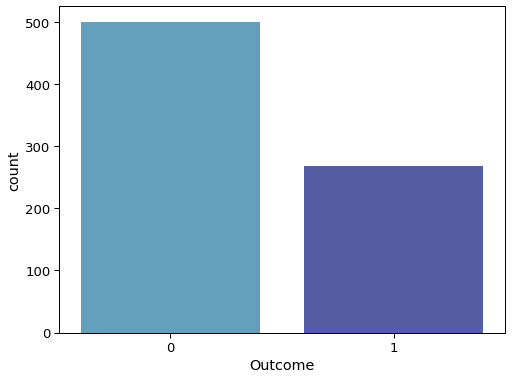

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ax = sns.countplot(diabetes_data_k['Outcome'])

In [11]:
import warnings
warnings.filterwarnings('ignore')

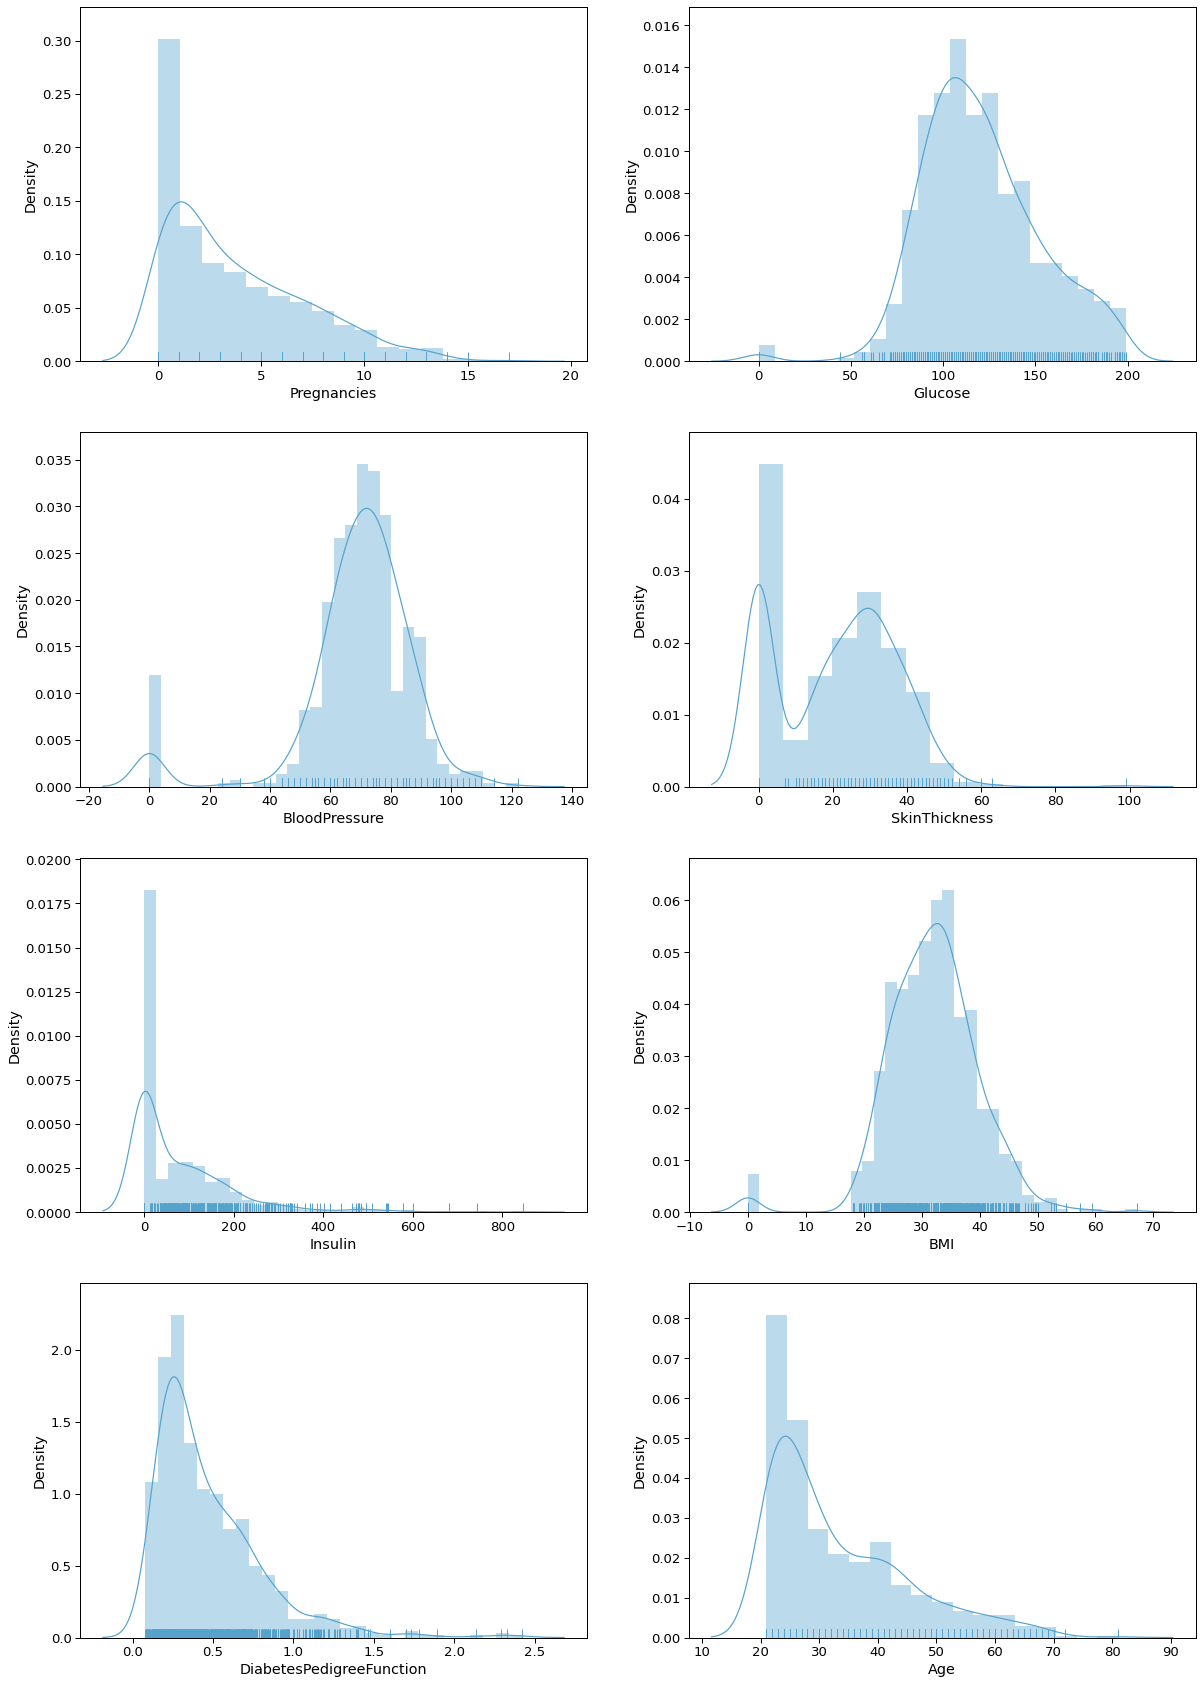

In [12]:
fig = plt.figure(figsize=(20,30))
# fig.subplots_adjust(hspace=0.5, wspace=0.4)
ax = fig.add_subplot(4,2, 1)
sns.distplot(diabetes_data_k['Pregnancies'],ax=ax,  rug=True)
ax = fig.add_subplot(4,2, 2)
sns.distplot(diabetes_data_k['Glucose'],ax=ax,  rug=True)
ax = fig.add_subplot(4,2, 3)
sns.distplot(diabetes_data_k['BloodPressure'],ax=ax,  rug=True)
ax = fig.add_subplot(4,2, 4)
sns.distplot(diabetes_data_k['SkinThickness'],ax=ax,   rug=True)
ax = fig.add_subplot(4,2, 5)
sns.distplot(diabetes_data_k['Insulin'],ax=ax,  rug=True)
ax = fig.add_subplot(4,2, 6)
sns.distplot(diabetes_data_k['BMI'],ax=ax,  rug=True)
ax = fig.add_subplot(4,2, 7)
sns.distplot(diabetes_data_k['DiabetesPedigreeFunction'],ax=ax,  rug=True)
ax = fig.add_subplot(4,2, 8)
sns.distplot(diabetes_data_k['Age'],ax=ax,  rug=True)
plt.show()

https://www.kaggle.com/loomis/a-guideline-on-starting-a-kaggle-competition

### Impyuter Library

In [8]:
def impute_mice(df):
    imputed_df = pd.DataFrame(mice(df.values), columns=df.columns)
    
    return imputed_df

## Missing values

Instead of using mean/median, we use the python library to generate them

In [17]:
# Setting all ZEROES to NaN
diabetes_data_k[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_k[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [18]:
diabetes_data_k.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

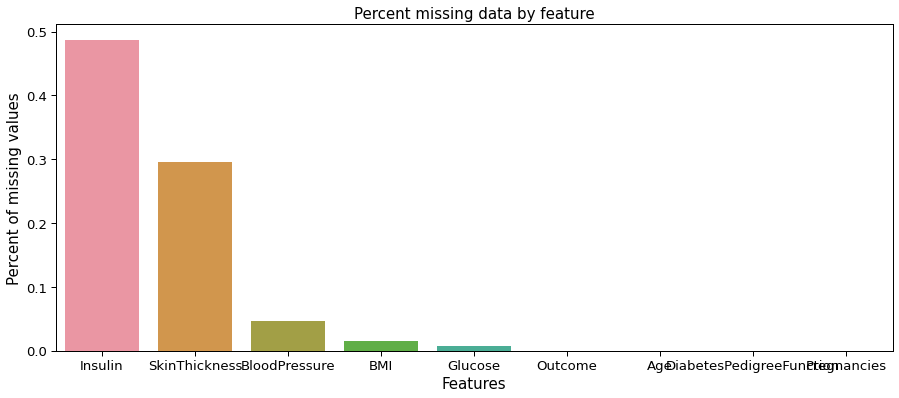

,Total,Percent
Insulin,374,0.486979
SkinThickness,227,0.295573
BloodPressure,35,0.045573
BMI,11,0.014323
Glucose,5,0.006510
Outcome,0,0.000000


In [19]:
total = diabetes_data_k.isnull().sum().sort_values(ascending=False)
percent = (diabetes_data_k.isnull().sum()/diabetes_data_k.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


# plot
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1, 1)
sns.barplot(x=missing_data.index, y=missing_data['Percent'],ax=ax)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

#table
missing_data.head(6)

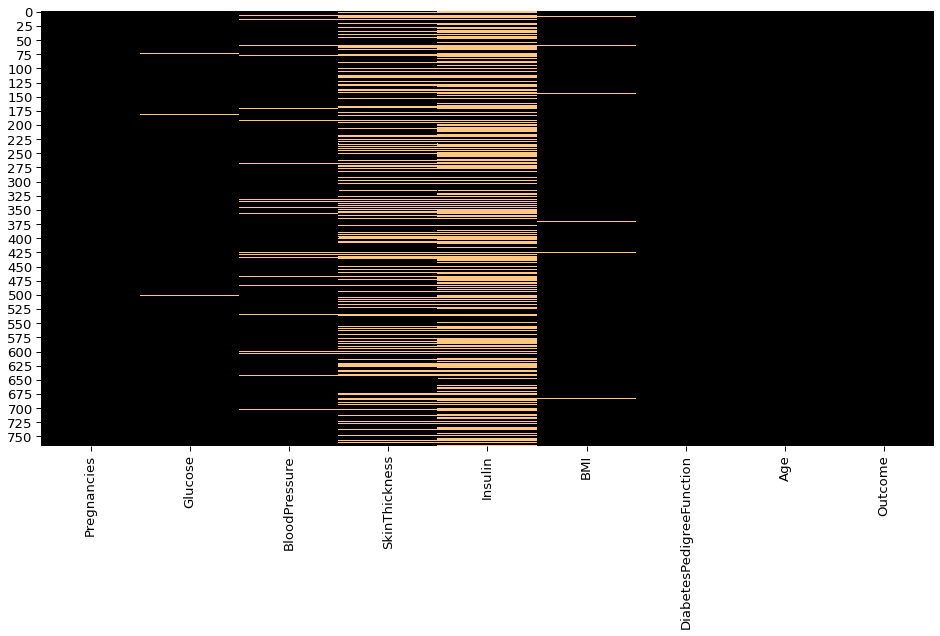

In [20]:
plt.figure(figsize=(16,8))
sns.heatmap(diabetes_data_k.isnull(), cbar=False, cmap="copper")

In [59]:
# making a copy, where by default deep=True 
# (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html)
df = diabetes_data_k.copy()

In [60]:
# name of col names
l_df_cols = list(diabetes_data_k.columns) 

### Here is where we diverge from the other notebook [2] in references

In [61]:
df_mice = impute_mice(df)

### Let's see how we did

In [25]:
def box_plot_var(df, feature):
    fig = plt.figure(figsize=(10,5))
    # fig.subplots_adjust(hspace=0.5, wspace=0.4)
    ax = fig.add_subplot(1,2, 1)
    sns.boxplot(data=df[[feature]][df['Outcome']==0])
    ax = fig.add_subplot(1,2, 2)
    sns.boxplot(data=df[[feature]][df['Outcome']==1])

1. Insulin

Original Data

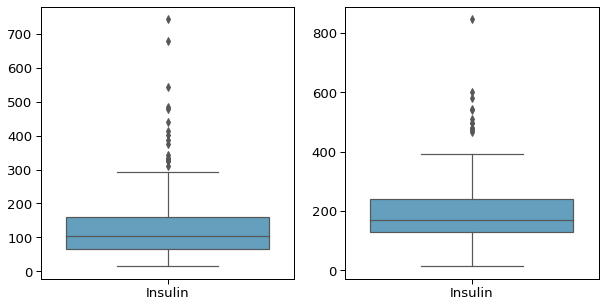

In [30]:
box_plot_var(diabetes_data_k, 'Insulin')

Imputed by MICE

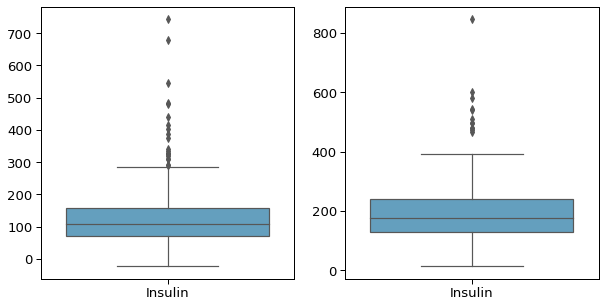

In [62]:
box_plot_var(df_mice, 'Insulin')

Imputed by Mean

In [63]:
# dropping the 'Outcome' column
cols = [col for col in l_df_cols if col not in ['Outcome']]

df_X = df[cols]
df_Y = df['Outcome']

In [65]:
#Impute the values using scikit-learn SimpleImpute Class
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='median') #for median imputation replace 'mean' with 'median'

# Fitting the data to the imputer object 
imp_mean.fit(df)

# Imputing the data      
imputed_matrix = imp_mean.transform(df)

In [43]:
print(imputed_matrix)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [44]:
df = pd.DataFrame(imputed_matrix, columns = l_df_cols)

In [66]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


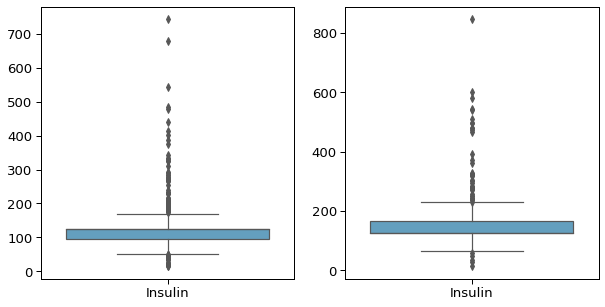

In [45]:
box_plot_var(df, 'Insulin')

to see if scikit library is not messing it up

In [48]:
# to see if scikit library is not messing it up
def feature_median(var):   
    temp = diabetes_data_k[diabetes_data_k[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [49]:
feature_median('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [54]:
df_temp = diabetes_data_k.copy()

In [55]:
#Data imputation
df_temp.loc[(df_temp['Outcome'] == 0 ) & (df_temp['Insulin'].isnull()), 'Insulin'] = 102
df_temp.loc[(df_temp['Outcome'] == 1 ) & (df_temp['Insulin'].isnull()), 'Insulin'] = 169
df_temp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,169.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [56]:
# testing via box plot

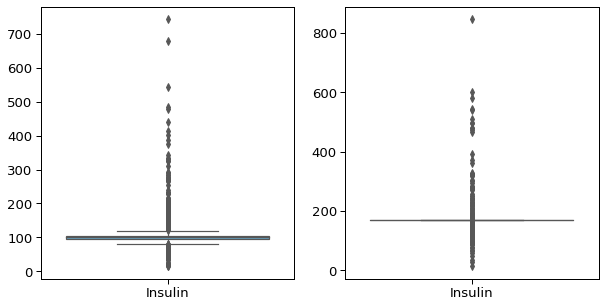

In [57]:
box_plot_var(df_temp, 'Insulin')

2. SkinThickness

Original Data

Imputed by MICE